In [1]:
import numpy as np
import matplotlib.pyplot as plt
mnist = np.load('mnist.npz')

list(mnist)

x_train = mnist['x_train']
x_test = mnist['x_test']
y_train = mnist['y_train']
y_test = mnist['y_test']

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape
#one hot X

(60000,)

In [4]:
x_train.max()

255

In [5]:
x_train.min()

0

In [6]:
y_train.max()

9

In [7]:
y_train.min()

0

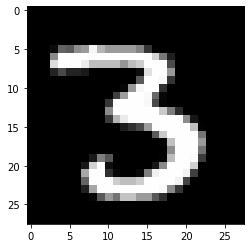

In [8]:
# 학습 샘플 수 - 6만개
#하나의 샘플 28 *28 -> 특징벡터
#각 특징 0~255

import matplotlib.pyplot as plt

y_train[0]
plt.imshow(x_train[12] , cmap = 'gray')
plt.show()

In [9]:
np.where(y_train == 3)

(array([    7,    10,    12, ..., 59978, 59980, 59996], dtype=int64),)

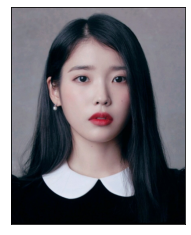

In [10]:
import cv2
im = cv2.imread('IU.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im = im[:,:,::-1]
#cv2.namedWindow('im' , cv2.WINDOW_NORMAL)
#cv2.imshow('demo' , im)
#cv2.waitKey(0)
plt.xticks([])
plt.yticks([])
plt.imshow(im)
plt.show()
#cv2.destroyAllWindows()

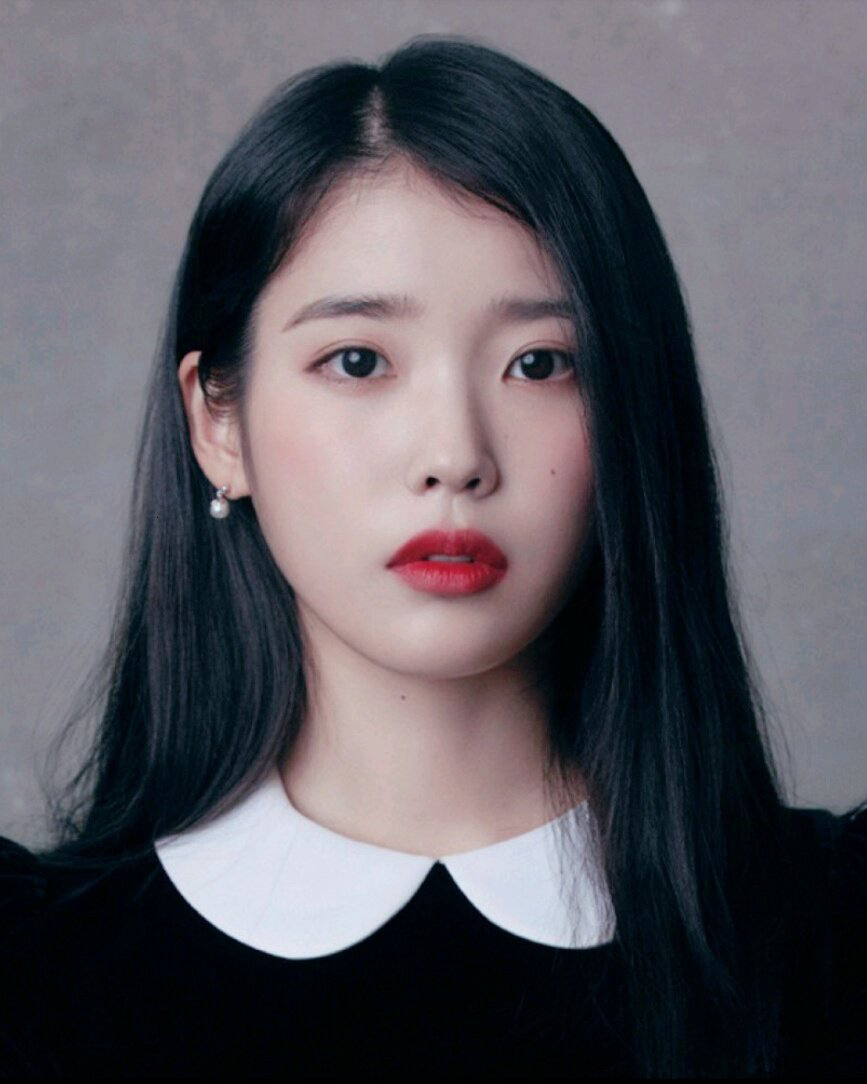

In [11]:
from PIL import Image as img
iuimg =img.open('IU.jpg')
type(img)
na = np.array(img)
type(na)
iuimg
#변환 가능

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#y_train = tf.one_hot(y_train , depth = 10)
#y_train[0]

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
def one_hot(labels , targets = 10):
    samples = len(labels)
    out = np.zeros((samples,targets))
    out[range(samples), labels] =1
    return out


In [14]:
y_train = one_hot(y_train,10)
y_test = one_hot(y_test,10)

In [15]:
x_train  =x_train.astype(np.float32) /255
x_test= x_test.astype(np.float32)/255

In [16]:
y_test.shape

(10000, 10)

In [17]:
learning_rate = 0.05

In [18]:
x = tf.placeholder(dtype = tf.float32 , shape = [None,784] , name = 'input')
y = tf.placeholder(dtype = tf.float32 , shape = [None ,10] , name = 'target')
NODES = 100
#w = tf.Variable(tf.truncated_normal(shape = [784,10] ,stddev = 0.1) , name = 'weight')
#b = tf.Variable(tf.zeros(shape = [10] , dtype =tf.float32) , name = 'bias')
#z= tf.matmul(x,w)+b
#yhat = tf.nn.softmax(z)
w1 = tf.Variable(tf.truncated_normal(shape = [784,NODES] ,stddev = 0.1) , name = 'weight')
b1 = tf.Variable(tf.zeros(shape = [NODES] , dtype =tf.float32) , name = 'bias')
z1 = tf.matmul(x,w1) +b1
a1 = tf.sigmoid(z1)

w2 = w1 = tf.Variable(tf.truncated_normal(shape = [NODES , 10] ,stddev = 0.1) , name = 'weight2')
b2 = tf.Variable(tf.zeros(shape = [10] , dtype =tf.float32) , name = 'bias2')
z2 = tf.matmul(a1,w2)+b2

yhat = tf.nn.softmax(z2)
#6만 곱하기 십

In [19]:
#loss = -tf.reduce_sum(y * tf.log(yhat) , axis =1)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y , logits = z2)
loss = tf.reduce_mean(loss)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

correct =tf.equal(tf.argmax(y,1) , tf.argmax(yhat,1)) #인덱스 뽑힘
accuracy = tf.reduce_mean(tf.cast(correct , tf.float32))

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
EPOCH = 80
BATCH = 1000 #하이퍼 파라미터
train_samples = x_train.shape[0]
steps = train_samples // BATCH

x_train_batch = x_train.reshape(-1,BATCH , 28*28) #-1-> 60 나옴 6만 나누기 1000
y_train_batch = y_train.reshape(-1,BATCH , 10)

In [22]:
x_test = x_test.reshape(-1,28*28)
y_test = y_test.reshape(-1,10)

loss_epoch = []
accuracy_epoch = []

loss_test = []
accuracy_test = []

In [23]:
for epoch in range (1,EPOCH +1):
    loss_batch = []
    accuracy_batch = []
    
    for step in range(steps): #0~59
        x_batch = x_train_batch[step]
        y_batch = y_train_batch[step]
        _,loss_,acc_ = sess.run([train,loss,accuracy] , feed_dict = {x : x_batch ,y:y_batch})
        print('epoch = {:4d} step ={:4d} loss = {:12.8f} accuracy = {:6.5f}'.format(epoch,step,loss_,acc_))
        
        loss_batch.append(loss_)
        accuracy_batch.append(acc_)
    mean_loss = np.mean(loss_batch)
    mean_accuracy = np.mean(accuracy_batch)
    loss_epoch.append(mean_loss)
    accuracy_epoch.append(mean_accuracy)
    print('train : loss = {:.8f} accuracy = {:.5f}'.format(mean_loss, mean_accuracy))
    
    loss_ ,acc_ = sess.run([loss,accuracy] , feed_dict = {x : x_test, y : y_test})
    loss_test.append(loss_)
    accuracy_test.append(acc_)
    print('test: loss {:.8f} accuracy = {:.5f}'.format(loss_,acc_))
sess.close()

epoch =    1 step =   0 loss =   2.34905767 accuracy = 0.06600
epoch =    1 step =   1 loss =   2.34781504 accuracy = 0.05800
epoch =    1 step =   2 loss =   2.33604240 accuracy = 0.05900
epoch =    1 step =   3 loss =   2.33150578 accuracy = 0.06000
epoch =    1 step =   4 loss =   2.31718469 accuracy = 0.05400
epoch =    1 step =   5 loss =   2.31115866 accuracy = 0.06200
epoch =    1 step =   6 loss =   2.31679201 accuracy = 0.06100
epoch =    1 step =   7 loss =   2.29991770 accuracy = 0.08300
epoch =    1 step =   8 loss =   2.29026175 accuracy = 0.10100
epoch =    1 step =   9 loss =   2.28519273 accuracy = 0.13300
epoch =    1 step =  10 loss =   2.28888106 accuracy = 0.12600
epoch =    1 step =  11 loss =   2.28411484 accuracy = 0.13900
epoch =    1 step =  12 loss =   2.28062391 accuracy = 0.16600
epoch =    1 step =  13 loss =   2.27565432 accuracy = 0.14600
epoch =    1 step =  14 loss =   2.26780152 accuracy = 0.17500
epoch =    1 step =  15 loss =   2.26690555 accuracy = 

epoch =    3 step =  42 loss =   1.70747888 accuracy = 0.68500
epoch =    3 step =  43 loss =   1.70754838 accuracy = 0.70000
epoch =    3 step =  44 loss =   1.71577024 accuracy = 0.71400
epoch =    3 step =  45 loss =   1.71128905 accuracy = 0.69100
epoch =    3 step =  46 loss =   1.69388902 accuracy = 0.69900
epoch =    3 step =  47 loss =   1.68130302 accuracy = 0.69100
epoch =    3 step =  48 loss =   1.64677465 accuracy = 0.71800
epoch =    3 step =  49 loss =   1.72514081 accuracy = 0.65900
epoch =    3 step =  50 loss =   1.67875206 accuracy = 0.70200
epoch =    3 step =  51 loss =   1.65803289 accuracy = 0.73100
epoch =    3 step =  52 loss =   1.67039871 accuracy = 0.70600
epoch =    3 step =  53 loss =   1.65860391 accuracy = 0.70800
epoch =    3 step =  54 loss =   1.65982068 accuracy = 0.71900
epoch =    3 step =  55 loss =   1.60699093 accuracy = 0.74500
epoch =    3 step =  56 loss =   1.64060771 accuracy = 0.74400
epoch =    3 step =  57 loss =   1.65679753 accuracy = 

epoch =    6 step =  25 loss =   1.11100543 accuracy = 0.82400
epoch =    6 step =  26 loss =   1.18730175 accuracy = 0.77000
epoch =    6 step =  27 loss =   1.16557598 accuracy = 0.78700
epoch =    6 step =  28 loss =   1.11018097 accuracy = 0.80900
epoch =    6 step =  29 loss =   1.19992101 accuracy = 0.76100
epoch =    6 step =  30 loss =   1.21975780 accuracy = 0.76300
epoch =    6 step =  31 loss =   1.23196554 accuracy = 0.76300
epoch =    6 step =  32 loss =   1.21110594 accuracy = 0.75900
epoch =    6 step =  33 loss =   1.13003838 accuracy = 0.81900
epoch =    6 step =  34 loss =   1.16696560 accuracy = 0.79300
epoch =    6 step =  35 loss =   1.15275609 accuracy = 0.81500
epoch =    6 step =  36 loss =   1.11553454 accuracy = 0.81100
epoch =    6 step =  37 loss =   1.16460276 accuracy = 0.76800
epoch =    6 step =  38 loss =   1.11891234 accuracy = 0.81100
epoch =    6 step =  39 loss =   1.14761901 accuracy = 0.76700
epoch =    6 step =  40 loss =   1.09371364 accuracy = 

epoch =    9 step =   9 loss =   0.82929492 accuracy = 0.83200
epoch =    9 step =  10 loss =   0.80491143 accuracy = 0.84800
epoch =    9 step =  11 loss =   0.86978495 accuracy = 0.82400
epoch =    9 step =  12 loss =   0.89810330 accuracy = 0.80400
epoch =    9 step =  13 loss =   0.90165514 accuracy = 0.80300
epoch =    9 step =  14 loss =   0.95810306 accuracy = 0.77300
epoch =    9 step =  15 loss =   0.87793189 accuracy = 0.83300
epoch =    9 step =  16 loss =   0.88611603 accuracy = 0.80300
epoch =    9 step =  17 loss =   0.93416250 accuracy = 0.78700
epoch =    9 step =  18 loss =   0.82633919 accuracy = 0.86400
epoch =    9 step =  19 loss =   0.82490587 accuracy = 0.83100
epoch =    9 step =  20 loss =   0.86662340 accuracy = 0.82400
epoch =    9 step =  21 loss =   0.78450847 accuracy = 0.85400
epoch =    9 step =  22 loss =   0.89484084 accuracy = 0.80300
epoch =    9 step =  23 loss =   0.84512001 accuracy = 0.82300
epoch =    9 step =  24 loss =   0.88851160 accuracy = 

epoch =   11 step =  56 loss =   0.66954994 accuracy = 0.86800
epoch =   11 step =  57 loss =   0.70690501 accuracy = 0.86800
epoch =   11 step =  58 loss =   0.60165864 accuracy = 0.89800
epoch =   11 step =  59 loss =   0.58843720 accuracy = 0.90600
train : loss = 0.73331815 accuracy = 0.84382
test: loss 0.68906242 accuracy = 0.85470
epoch =   12 step =   0 loss =   0.72527838 accuracy = 0.84100
epoch =   12 step =   1 loss =   0.71124029 accuracy = 0.84300
epoch =   12 step =   2 loss =   0.65447325 accuracy = 0.86500
epoch =   12 step =   3 loss =   0.70357043 accuracy = 0.85300
epoch =   12 step =   4 loss =   0.67537099 accuracy = 0.85900
epoch =   12 step =   5 loss =   0.67802316 accuracy = 0.85600
epoch =   12 step =   6 loss =   0.64128631 accuracy = 0.87200
epoch =   12 step =   7 loss =   0.76920915 accuracy = 0.81900
epoch =   12 step =   8 loss =   0.75767833 accuracy = 0.83000
epoch =   12 step =   9 loss =   0.66159755 accuracy = 0.85500
epoch =   12 step =  10 loss =  

epoch =   14 step =  40 loss =   0.57178575 accuracy = 0.88200
epoch =   14 step =  41 loss =   0.68351758 accuracy = 0.84000
epoch =   14 step =  42 loss =   0.66725767 accuracy = 0.82900
epoch =   14 step =  43 loss =   0.58886343 accuracy = 0.86800
epoch =   14 step =  44 loss =   0.62865591 accuracy = 0.86200
epoch =   14 step =  45 loss =   0.64712876 accuracy = 0.84500
epoch =   14 step =  46 loss =   0.62103325 accuracy = 0.85900
epoch =   14 step =  47 loss =   0.63278466 accuracy = 0.85300
epoch =   14 step =  48 loss =   0.54994005 accuracy = 0.87700
epoch =   14 step =  49 loss =   0.70691657 accuracy = 0.80800
epoch =   14 step =  50 loss =   0.64441687 accuracy = 0.85300
epoch =   14 step =  51 loss =   0.57219195 accuracy = 0.87400
epoch =   14 step =  52 loss =   0.66210371 accuracy = 0.83000
epoch =   14 step =  53 loss =   0.59732795 accuracy = 0.86900
epoch =   14 step =  54 loss =   0.60232681 accuracy = 0.86700
epoch =   14 step =  55 loss =   0.53303725 accuracy = 

epoch =   17 step =  13 loss =   0.60169297 accuracy = 0.84400
epoch =   17 step =  14 loss =   0.66652250 accuracy = 0.82600
epoch =   17 step =  15 loss =   0.56668532 accuracy = 0.87300
epoch =   17 step =  16 loss =   0.58131433 accuracy = 0.85400
epoch =   17 step =  17 loss =   0.62324345 accuracy = 0.84300
epoch =   17 step =  18 loss =   0.50055337 accuracy = 0.90800
epoch =   17 step =  19 loss =   0.52626288 accuracy = 0.87700
epoch =   17 step =  20 loss =   0.58018911 accuracy = 0.86100
epoch =   17 step =  21 loss =   0.48199388 accuracy = 0.90200
epoch =   17 step =  22 loss =   0.57749671 accuracy = 0.84900
epoch =   17 step =  23 loss =   0.54472154 accuracy = 0.87200
epoch =   17 step =  24 loss =   0.59399223 accuracy = 0.85800
epoch =   17 step =  25 loss =   0.50013638 accuracy = 0.89400
epoch =   17 step =  26 loss =   0.58384895 accuracy = 0.87000
epoch =   17 step =  27 loss =   0.55663723 accuracy = 0.86300
epoch =   17 step =  28 loss =   0.51952016 accuracy = 

epoch =   19 step =  58 loss =   0.38141924 accuracy = 0.93100
epoch =   19 step =  59 loss =   0.39802369 accuracy = 0.92100
train : loss = 0.52139342 accuracy = 0.87490
test: loss 0.49265039 accuracy = 0.88170
epoch =   20 step =   0 loss =   0.53211224 accuracy = 0.86600
epoch =   20 step =   1 loss =   0.51104003 accuracy = 0.88300
epoch =   20 step =   2 loss =   0.45850682 accuracy = 0.89400
epoch =   20 step =   3 loss =   0.49298716 accuracy = 0.88600
epoch =   20 step =   4 loss =   0.47921205 accuracy = 0.88700
epoch =   20 step =   5 loss =   0.48524809 accuracy = 0.88200
epoch =   20 step =   6 loss =   0.44843915 accuracy = 0.89300
epoch =   20 step =   7 loss =   0.55999601 accuracy = 0.85900
epoch =   20 step =   8 loss =   0.57959604 accuracy = 0.86000
epoch =   20 step =   9 loss =   0.47675034 accuracy = 0.88800
epoch =   20 step =  10 loss =   0.44210893 accuracy = 0.90700
epoch =   20 step =  11 loss =   0.51926845 accuracy = 0.86400
epoch =   20 step =  12 loss =  

epoch =   22 step =  45 loss =   0.51356685 accuracy = 0.86700
epoch =   22 step =  46 loss =   0.48712888 accuracy = 0.88200
epoch =   22 step =  47 loss =   0.50031143 accuracy = 0.87300
epoch =   22 step =  48 loss =   0.41911691 accuracy = 0.89500
epoch =   22 step =  49 loss =   0.57302493 accuracy = 0.84300
epoch =   22 step =  50 loss =   0.51895529 accuracy = 0.87500
epoch =   22 step =  51 loss =   0.43952504 accuracy = 0.88700
epoch =   22 step =  52 loss =   0.53929466 accuracy = 0.84900
epoch =   22 step =  53 loss =   0.46306792 accuracy = 0.88900
epoch =   22 step =  54 loss =   0.47004363 accuracy = 0.88100
epoch =   22 step =  55 loss =   0.40480471 accuracy = 0.90800
epoch =   22 step =  56 loss =   0.43055284 accuracy = 0.89800
epoch =   22 step =  57 loss =   0.45619166 accuracy = 0.89900
epoch =   22 step =  58 loss =   0.34224108 accuracy = 0.93500
epoch =   22 step =  59 loss =   0.36593199 accuracy = 0.92500
train : loss = 0.48311487 accuracy = 0.88077
test: loss

epoch =   25 step =  31 loss =   0.54811287 accuracy = 0.84700
epoch =   25 step =  32 loss =   0.52150911 accuracy = 0.85600
epoch =   25 step =  33 loss =   0.41461140 accuracy = 0.90200
epoch =   25 step =  34 loss =   0.46332201 accuracy = 0.87600
epoch =   25 step =  35 loss =   0.42252132 accuracy = 0.89100
epoch =   25 step =  36 loss =   0.40975672 accuracy = 0.90200
epoch =   25 step =  37 loss =   0.51919585 accuracy = 0.85900
epoch =   25 step =  38 loss =   0.43018255 accuracy = 0.89000
epoch =   25 step =  39 loss =   0.48828813 accuracy = 0.88700
epoch =   25 step =  40 loss =   0.40699422 accuracy = 0.90400
epoch =   25 step =  41 loss =   0.50325173 accuracy = 0.87700
epoch =   25 step =  42 loss =   0.51536524 accuracy = 0.85300
epoch =   25 step =  43 loss =   0.41993237 accuracy = 0.89200
epoch =   25 step =  44 loss =   0.45720729 accuracy = 0.88600
epoch =   25 step =  45 loss =   0.48634070 accuracy = 0.87400
epoch =   25 step =  46 loss =   0.45952240 accuracy = 

epoch =   28 step =  16 loss =   0.45016846 accuracy = 0.87200
epoch =   28 step =  17 loss =   0.48327509 accuracy = 0.86500
epoch =   28 step =  18 loss =   0.36915836 accuracy = 0.92300
epoch =   28 step =  19 loss =   0.40390539 accuracy = 0.89400
epoch =   28 step =  20 loss =   0.46341512 accuracy = 0.87900
epoch =   28 step =  21 loss =   0.36073378 accuracy = 0.92900
epoch =   28 step =  22 loss =   0.44079995 accuracy = 0.87800
epoch =   28 step =  23 loss =   0.42174554 accuracy = 0.89300
epoch =   28 step =  24 loss =   0.47163093 accuracy = 0.86600
epoch =   28 step =  25 loss =   0.38241571 accuracy = 0.90000
epoch =   28 step =  26 loss =   0.46132061 accuracy = 0.88800
epoch =   28 step =  27 loss =   0.43328100 accuracy = 0.88000
epoch =   28 step =  28 loss =   0.40303797 accuracy = 0.90100
epoch =   28 step =  29 loss =   0.48943332 accuracy = 0.86500
epoch =   28 step =  30 loss =   0.50041443 accuracy = 0.86000
epoch =   28 step =  31 loss =   0.52592701 accuracy = 

epoch =   31 step =   1 loss =   0.41212684 accuracy = 0.89900
epoch =   31 step =   2 loss =   0.36003503 accuracy = 0.91100
epoch =   31 step =   3 loss =   0.38478047 accuracy = 0.90700
epoch =   31 step =   4 loss =   0.38210356 accuracy = 0.90100
epoch =   31 step =   5 loss =   0.39062268 accuracy = 0.90000
epoch =   31 step =   6 loss =   0.35595948 accuracy = 0.90800
epoch =   31 step =   7 loss =   0.44984844 accuracy = 0.88000
epoch =   31 step =   8 loss =   0.48907411 accuracy = 0.87200
epoch =   31 step =   9 loss =   0.38790128 accuracy = 0.89800
epoch =   31 step =  10 loss =   0.34884462 accuracy = 0.91800
epoch =   31 step =  11 loss =   0.42685497 accuracy = 0.88800
epoch =   31 step =  12 loss =   0.45647687 accuracy = 0.87000
epoch =   31 step =  13 loss =   0.45844239 accuracy = 0.87100
epoch =   31 step =  14 loss =   0.52347136 accuracy = 0.85400
epoch =   31 step =  15 loss =   0.41904375 accuracy = 0.89700
epoch =   31 step =  16 loss =   0.43048853 accuracy = 

epoch =   33 step =  45 loss =   0.43864906 accuracy = 0.87800
epoch =   33 step =  46 loss =   0.41086811 accuracy = 0.89400
epoch =   33 step =  47 loss =   0.42314142 accuracy = 0.88600
epoch =   33 step =  48 loss =   0.34587479 accuracy = 0.91000
epoch =   33 step =  49 loss =   0.49201185 accuracy = 0.86800
epoch =   33 step =  50 loss =   0.44795620 accuracy = 0.88300
epoch =   33 step =  51 loss =   0.36532208 accuracy = 0.89600
epoch =   33 step =  52 loss =   0.46948877 accuracy = 0.86800
epoch =   33 step =  53 loss =   0.38662922 accuracy = 0.89600
epoch =   33 step =  54 loss =   0.39522123 accuracy = 0.89100
epoch =   33 step =  55 loss =   0.33504331 accuracy = 0.91400
epoch =   33 step =  56 loss =   0.35425857 accuracy = 0.91200
epoch =   33 step =  57 loss =   0.37318888 accuracy = 0.90600
epoch =   33 step =  58 loss =   0.26404199 accuracy = 0.94000
epoch =   33 step =  59 loss =   0.30397114 accuracy = 0.93400
train : loss = 0.40379518 accuracy = 0.89265
test: loss

epoch =   36 step =  19 loss =   0.36169213 accuracy = 0.90200
epoch =   36 step =  20 loss =   0.42494580 accuracy = 0.89200
epoch =   36 step =  21 loss =   0.32180187 accuracy = 0.93300
epoch =   36 step =  22 loss =   0.39472765 accuracy = 0.88600
epoch =   36 step =  23 loss =   0.38093525 accuracy = 0.89900
epoch =   36 step =  24 loss =   0.43049270 accuracy = 0.87200
epoch =   36 step =  25 loss =   0.34394288 accuracy = 0.90700
epoch =   36 step =  26 loss =   0.41975194 accuracy = 0.89800
epoch =   36 step =  27 loss =   0.39232612 accuracy = 0.89000
epoch =   36 step =  28 loss =   0.36426800 accuracy = 0.90900
epoch =   36 step =  29 loss =   0.44654173 accuracy = 0.87700
epoch =   36 step =  30 loss =   0.45281208 accuracy = 0.86300
epoch =   36 step =  31 loss =   0.48457530 accuracy = 0.85500
epoch =   36 step =  32 loss =   0.45240614 accuracy = 0.87100
epoch =   36 step =  33 loss =   0.34628576 accuracy = 0.90900
epoch =   36 step =  34 loss =   0.39673212 accuracy = 

epoch =   39 step =   2 loss =   0.32384515 accuracy = 0.92200
epoch =   39 step =   3 loss =   0.34478346 accuracy = 0.91600
epoch =   39 step =   4 loss =   0.34679329 accuracy = 0.90500
epoch =   39 step =   5 loss =   0.35670117 accuracy = 0.91000
epoch =   39 step =   6 loss =   0.32309246 accuracy = 0.90900
epoch =   39 step =   7 loss =   0.40875360 accuracy = 0.88700
epoch =   39 step =   8 loss =   0.45617911 accuracy = 0.87900
epoch =   39 step =   9 loss =   0.35576454 accuracy = 0.90500
epoch =   39 step =  10 loss =   0.31582940 accuracy = 0.92100
epoch =   39 step =  11 loss =   0.39272901 accuracy = 0.89000
epoch =   39 step =  12 loss =   0.42348221 accuracy = 0.87900
epoch =   39 step =  13 loss =   0.42305413 accuracy = 0.87500
epoch =   39 step =  14 loss =   0.48660275 accuracy = 0.86300
epoch =   39 step =  15 loss =   0.38309392 accuracy = 0.90400
epoch =   39 step =  16 loss =   0.39229193 accuracy = 0.89200
epoch =   39 step =  17 loss =   0.42001644 accuracy = 

epoch =   41 step =  48 loss =   0.31712857 accuracy = 0.91300
epoch =   41 step =  49 loss =   0.45792934 accuracy = 0.87600
epoch =   41 step =  50 loss =   0.41954735 accuracy = 0.88600
epoch =   41 step =  51 loss =   0.33615565 accuracy = 0.90100
epoch =   41 step =  52 loss =   0.44146034 accuracy = 0.87000
epoch =   41 step =  53 loss =   0.35659841 accuracy = 0.89900
epoch =   41 step =  54 loss =   0.36570957 accuracy = 0.89300
epoch =   41 step =  55 loss =   0.30876976 accuracy = 0.92100
epoch =   41 step =  56 loss =   0.32445842 accuracy = 0.91100
epoch =   41 step =  57 loss =   0.34011537 accuracy = 0.90600
epoch =   41 step =  58 loss =   0.23535965 accuracy = 0.94200
epoch =   41 step =  59 loss =   0.28178710 accuracy = 0.93600
train : loss = 0.37279370 accuracy = 0.89828
test: loss 0.35310361 accuracy = 0.90310
epoch =   42 step =   0 loss =   0.38889199 accuracy = 0.89200
epoch =   42 step =   1 loss =   0.36767408 accuracy = 0.89900
epoch =   42 step =   2 loss =  

epoch =   44 step =  32 loss =   0.42249170 accuracy = 0.88300
epoch =   44 step =  33 loss =   0.31801471 accuracy = 0.91700
epoch =   44 step =  34 loss =   0.36853883 accuracy = 0.89600
epoch =   44 step =  35 loss =   0.32341200 accuracy = 0.91100
epoch =   44 step =  36 loss =   0.32461604 accuracy = 0.91700
epoch =   44 step =  37 loss =   0.44255498 accuracy = 0.87500
epoch =   44 step =  38 loss =   0.33912897 accuracy = 0.90000
epoch =   44 step =  39 loss =   0.39578673 accuracy = 0.89800
epoch =   44 step =  40 loss =   0.31919745 accuracy = 0.91900
epoch =   44 step =  41 loss =   0.40182805 accuracy = 0.88600
epoch =   44 step =  42 loss =   0.43389368 accuracy = 0.87600
epoch =   44 step =  43 loss =   0.32982862 accuracy = 0.90600
epoch =   44 step =  44 loss =   0.36275142 accuracy = 0.90200
epoch =   44 step =  45 loss =   0.40126678 accuracy = 0.88700
epoch =   44 step =  46 loss =   0.37272877 accuracy = 0.90700
epoch =   44 step =  47 loss =   0.38332519 accuracy = 

epoch =   47 step =  16 loss =   0.36619231 accuracy = 0.89400
epoch =   47 step =  17 loss =   0.39131644 accuracy = 0.88400
epoch =   47 step =  18 loss =   0.29166269 accuracy = 0.93500
epoch =   47 step =  19 loss =   0.32536653 accuracy = 0.90800
epoch =   47 step =  20 loss =   0.39328042 accuracy = 0.89600
epoch =   47 step =  21 loss =   0.29097331 accuracy = 0.93700
epoch =   47 step =  22 loss =   0.35632282 accuracy = 0.89400
epoch =   47 step =  23 loss =   0.34735265 accuracy = 0.90700
epoch =   47 step =  24 loss =   0.39574268 accuracy = 0.87600
epoch =   47 step =  25 loss =   0.31248167 accuracy = 0.91200
epoch =   47 step =  26 loss =   0.38480750 accuracy = 0.90300
epoch =   47 step =  27 loss =   0.35864741 accuracy = 0.89500
epoch =   47 step =  28 loss =   0.33186206 accuracy = 0.91500
epoch =   47 step =  29 loss =   0.40924060 accuracy = 0.88400
epoch =   47 step =  30 loss =   0.41082343 accuracy = 0.87200
epoch =   47 step =  31 loss =   0.44920674 accuracy = 

epoch =   50 step =   1 loss =   0.34778082 accuracy = 0.90200
epoch =   50 step =   2 loss =   0.29223907 accuracy = 0.92600
epoch =   50 step =   3 loss =   0.30985487 accuracy = 0.92300
epoch =   50 step =   4 loss =   0.31621423 accuracy = 0.91600
epoch =   50 step =   5 loss =   0.32750186 accuracy = 0.91500
epoch =   50 step =   6 loss =   0.29503876 accuracy = 0.91600
epoch =   50 step =   7 loss =   0.37299204 accuracy = 0.89700
epoch =   50 step =   8 loss =   0.42751753 accuracy = 0.88100
epoch =   50 step =   9 loss =   0.32756758 accuracy = 0.91200
epoch =   50 step =  10 loss =   0.28813994 accuracy = 0.92600
epoch =   50 step =  11 loss =   0.36240289 accuracy = 0.90000
epoch =   50 step =  12 loss =   0.39469856 accuracy = 0.88700
epoch =   50 step =  13 loss =   0.39148137 accuracy = 0.88500
epoch =   50 step =  14 loss =   0.45327103 accuracy = 0.87900
epoch =   50 step =  15 loss =   0.35186559 accuracy = 0.91000
epoch =   50 step =  16 loss =   0.35828930 accuracy = 

epoch =   52 step =  26 loss =   0.37331942 accuracy = 0.90300
epoch =   52 step =  27 loss =   0.34777778 accuracy = 0.89700
epoch =   52 step =  28 loss =   0.32120624 accuracy = 0.91900
epoch =   52 step =  29 loss =   0.39662603 accuracy = 0.88800
epoch =   52 step =  30 loss =   0.39659631 accuracy = 0.87700
epoch =   52 step =  31 loss =   0.43735418 accuracy = 0.86800
epoch =   52 step =  32 loss =   0.40053409 accuracy = 0.88900
epoch =   52 step =  33 loss =   0.29800034 accuracy = 0.92000
epoch =   52 step =  34 loss =   0.34822437 accuracy = 0.89800
epoch =   52 step =  35 loss =   0.30264679 accuracy = 0.91400
epoch =   52 step =  36 loss =   0.30734071 accuracy = 0.91800
epoch =   52 step =  37 loss =   0.42689005 accuracy = 0.88000
epoch =   52 step =  38 loss =   0.31949335 accuracy = 0.90300
epoch =   52 step =  39 loss =   0.37557691 accuracy = 0.90100
epoch =   52 step =  40 loss =   0.30041698 accuracy = 0.92000
epoch =   52 step =  41 loss =   0.38016114 accuracy = 

epoch =   54 step =  58 loss =   0.20752212 accuracy = 0.94400
epoch =   54 step =  59 loss =   0.25992450 accuracy = 0.94000
train : loss = 0.34072989 accuracy = 0.90512
test: loss 0.32358250 accuracy = 0.90940
epoch =   55 step =   0 loss =   0.35661826 accuracy = 0.89500
epoch =   55 step =   1 loss =   0.33812243 accuracy = 0.90800
epoch =   55 step =   2 loss =   0.28165331 accuracy = 0.92800
epoch =   55 step =   3 loss =   0.29816711 accuracy = 0.92500
epoch =   55 step =   4 loss =   0.30604237 accuracy = 0.91900
epoch =   55 step =   5 loss =   0.31778345 accuracy = 0.91600
epoch =   55 step =   6 loss =   0.28577989 accuracy = 0.92200
epoch =   55 step =   7 loss =   0.36107227 accuracy = 0.90000
epoch =   55 step =   8 loss =   0.41779420 accuracy = 0.88200
epoch =   55 step =   9 loss =   0.31799737 accuracy = 0.91600
epoch =   55 step =  10 loss =   0.27916598 accuracy = 0.92800
epoch =   55 step =  11 loss =   0.35201740 accuracy = 0.90300
epoch =   55 step =  12 loss =  

epoch =   57 step =   5 loss =   0.31430665 accuracy = 0.91900
epoch =   57 step =   6 loss =   0.28248072 accuracy = 0.92300
epoch =   57 step =   7 loss =   0.35680988 accuracy = 0.90100
epoch =   57 step =   8 loss =   0.41427848 accuracy = 0.88100
epoch =   57 step =   9 loss =   0.31454495 accuracy = 0.91600
epoch =   57 step =  10 loss =   0.27599117 accuracy = 0.92900
epoch =   57 step =  11 loss =   0.34825820 accuracy = 0.90400
epoch =   57 step =  12 loss =   0.38141221 accuracy = 0.89200
epoch =   57 step =  13 loss =   0.37669095 accuracy = 0.89000
epoch =   57 step =  14 loss =   0.43763834 accuracy = 0.88200
epoch =   57 step =  15 loss =   0.33774269 accuracy = 0.91200
epoch =   57 step =  16 loss =   0.34252715 accuracy = 0.90000
epoch =   57 step =  17 loss =   0.36539000 accuracy = 0.88900
epoch =   57 step =  18 loss =   0.27155724 accuracy = 0.93900
epoch =   57 step =  19 loss =   0.30286255 accuracy = 0.91300
epoch =   57 step =  20 loss =   0.37421876 accuracy = 

epoch =   59 step =  49 loss =   0.40985328 accuracy = 0.88700
epoch =   59 step =  50 loss =   0.38040283 accuracy = 0.89400
epoch =   59 step =  51 loss =   0.29670539 accuracy = 0.90700
epoch =   59 step =  52 loss =   0.40283296 accuracy = 0.88300
epoch =   59 step =  53 loss =   0.31682339 accuracy = 0.90200
epoch =   59 step =  54 loss =   0.32559681 accuracy = 0.90200
epoch =   59 step =  55 loss =   0.27506298 accuracy = 0.92600
epoch =   59 step =  56 loss =   0.28526101 accuracy = 0.91500
epoch =   59 step =  57 loss =   0.29593554 accuracy = 0.91500
epoch =   59 step =  58 loss =   0.20006265 accuracy = 0.94700
epoch =   59 step =  59 loss =   0.25383964 accuracy = 0.94100
train : loss = 0.33164564 accuracy = 0.90725
test: loss 0.31532577 accuracy = 0.91210
epoch =   60 step =   0 loss =   0.34733537 accuracy = 0.89900
epoch =   60 step =   1 loss =   0.32988617 accuracy = 0.90900
epoch =   60 step =   2 loss =   0.27258003 accuracy = 0.92900
epoch =   60 step =   3 loss =  

epoch =   62 step =   4 loss =   0.29421145 accuracy = 0.91900
epoch =   62 step =   5 loss =   0.30642703 accuracy = 0.91900
epoch =   62 step =   6 loss =   0.27503505 accuracy = 0.92500
epoch =   62 step =   7 loss =   0.34715611 accuracy = 0.90600
epoch =   62 step =   8 loss =   0.40622017 accuracy = 0.88400
epoch =   62 step =   9 loss =   0.30665985 accuracy = 0.91600
epoch =   62 step =  10 loss =   0.26886949 accuracy = 0.93200
epoch =   62 step =  11 loss =   0.33964562 accuracy = 0.90600
epoch =   62 step =  12 loss =   0.37335247 accuracy = 0.89600
epoch =   62 step =  13 loss =   0.36766303 accuracy = 0.89500
epoch =   62 step =  14 loss =   0.42811188 accuracy = 0.88400
epoch =   62 step =  15 loss =   0.32932708 accuracy = 0.91500
epoch =   62 step =  16 loss =   0.33298424 accuracy = 0.90400
epoch =   62 step =  17 loss =   0.35501826 accuracy = 0.89000
epoch =   62 step =  18 loss =   0.26379791 accuracy = 0.94000
epoch =   62 step =  19 loss =   0.29380816 accuracy = 

epoch =   64 step =  42 loss =   0.39644530 accuracy = 0.88600
epoch =   64 step =  43 loss =   0.28972930 accuracy = 0.91500
epoch =   64 step =  44 loss =   0.32029724 accuracy = 0.91000
epoch =   64 step =  45 loss =   0.36364692 accuracy = 0.89500
epoch =   64 step =  46 loss =   0.33473074 accuracy = 0.91400
epoch =   64 step =  47 loss =   0.34245184 accuracy = 0.90100
epoch =   64 step =  48 loss =   0.27099341 accuracy = 0.92500
epoch =   64 step =  49 loss =   0.40022132 accuracy = 0.88900
epoch =   64 step =  50 loss =   0.37256691 accuracy = 0.89500
epoch =   64 step =  51 loss =   0.28893411 accuracy = 0.91000
epoch =   64 step =  52 loss =   0.39508510 accuracy = 0.88700
epoch =   64 step =  53 loss =   0.30918542 accuracy = 0.90500
epoch =   64 step =  54 loss =   0.31760889 accuracy = 0.90400
epoch =   64 step =  55 loss =   0.26868671 accuracy = 0.92700
epoch =   64 step =  56 loss =   0.27776840 accuracy = 0.91800
epoch =   64 step =  57 loss =   0.28744683 accuracy = 

epoch =   67 step =  14 loss =   0.41959023 accuracy = 0.88700
epoch =   67 step =  15 loss =   0.32193166 accuracy = 0.91500
epoch =   67 step =  16 loss =   0.32449394 accuracy = 0.90700
epoch =   67 step =  17 loss =   0.34585479 accuracy = 0.89400
epoch =   67 step =  18 loss =   0.25708887 accuracy = 0.94100
epoch =   67 step =  19 loss =   0.28579688 accuracy = 0.92000
epoch =   67 step =  20 loss =   0.35979247 accuracy = 0.90400
epoch =   67 step =  21 loss =   0.26116836 accuracy = 0.94100
epoch =   67 step =  22 loss =   0.31596538 accuracy = 0.90300
epoch =   67 step =  23 loss =   0.31236798 accuracy = 0.91200
epoch =   67 step =  24 loss =   0.35764894 accuracy = 0.88700
epoch =   67 step =  25 loss =   0.27987319 accuracy = 0.92300
epoch =   67 step =  26 loss =   0.34742761 accuracy = 0.90900
epoch =   67 step =  27 loss =   0.32366297 accuracy = 0.90200
epoch =   67 step =  28 loss =   0.29708526 accuracy = 0.92200
epoch =   67 step =  29 loss =   0.36752540 accuracy = 

epoch =   69 step =  57 loss =   0.27993006 accuracy = 0.92000
epoch =   69 step =  58 loss =   0.18818982 accuracy = 0.95200
epoch =   69 step =  59 loss =   0.24372567 accuracy = 0.93900
train : loss = 0.31659776 accuracy = 0.91108
test: loss 0.30177978 accuracy = 0.91550
epoch =   70 step =   0 loss =   0.33179703 accuracy = 0.90100
epoch =   70 step =   1 loss =   0.31632629 accuracy = 0.91400
epoch =   70 step =   2 loss =   0.25766179 accuracy = 0.93100
epoch =   70 step =   3 loss =   0.27165967 accuracy = 0.92900
epoch =   70 step =   4 loss =   0.28312573 accuracy = 0.91900
epoch =   70 step =   5 loss =   0.29567739 accuracy = 0.92100
epoch =   70 step =   6 loss =   0.26496631 accuracy = 0.92800
epoch =   70 step =   7 loss =   0.33400279 accuracy = 0.90800
epoch =   70 step =   8 loss =   0.39498180 accuracy = 0.89200
epoch =   70 step =   9 loss =   0.29575995 accuracy = 0.91500
epoch =   70 step =  10 loss =   0.25932163 accuracy = 0.93300
epoch =   70 step =  11 loss =  

epoch =   72 step =  27 loss =   0.31740192 accuracy = 0.90500
epoch =   72 step =  28 loss =   0.29070976 accuracy = 0.92300
epoch =   72 step =  29 loss =   0.35975853 accuracy = 0.90000
epoch =   72 step =  30 loss =   0.35520160 accuracy = 0.89200
epoch =   72 step =  31 loss =   0.40258634 accuracy = 0.87600
epoch =   72 step =  32 loss =   0.36250800 accuracy = 0.89700
epoch =   72 step =  33 loss =   0.26512912 accuracy = 0.92400
epoch =   72 step =  34 loss =   0.31427097 accuracy = 0.90800
epoch =   72 step =  35 loss =   0.26910540 accuracy = 0.92600
epoch =   72 step =  36 loss =   0.27940613 accuracy = 0.92700
epoch =   72 step =  37 loss =   0.40035513 accuracy = 0.88300
epoch =   72 step =  38 loss =   0.28656125 accuracy = 0.91400
epoch =   72 step =  39 loss =   0.34116733 accuracy = 0.90800
epoch =   72 step =  40 loss =   0.26882905 accuracy = 0.93100
epoch =   72 step =  41 loss =   0.34418979 accuracy = 0.90100
epoch =   72 step =  42 loss =   0.38576373 accuracy = 

epoch =   74 step =  57 loss =   0.27318555 accuracy = 0.92100
epoch =   74 step =  58 loss =   0.18333180 accuracy = 0.95400
epoch =   74 step =  59 loss =   0.23936772 accuracy = 0.94000
train : loss = 0.31019428 accuracy = 0.91237
test: loss 0.29606760 accuracy = 0.91740
epoch =   75 step =   0 loss =   0.32511804 accuracy = 0.90100
epoch =   75 step =   1 loss =   0.31057075 accuracy = 0.91300
epoch =   75 step =   2 loss =   0.25138593 accuracy = 0.93500
epoch =   75 step =   3 loss =   0.26470402 accuracy = 0.93100
epoch =   75 step =   4 loss =   0.27715734 accuracy = 0.92000
epoch =   75 step =   5 loss =   0.28981885 accuracy = 0.92100
epoch =   75 step =   6 loss =   0.25953490 accuracy = 0.92700
epoch =   75 step =   7 loss =   0.32684344 accuracy = 0.90800
epoch =   75 step =   8 loss =   0.38871935 accuracy = 0.89300
epoch =   75 step =   9 loss =   0.28975070 accuracy = 0.91700
epoch =   75 step =  10 loss =   0.25419733 accuracy = 0.93200
epoch =   75 step =  11 loss =  

epoch =   77 step =  31 loss =   0.39577070 accuracy = 0.88200
epoch =   77 step =  32 loss =   0.35510546 accuracy = 0.89700
epoch =   77 step =  33 loss =   0.25901422 accuracy = 0.92400
epoch =   77 step =  34 loss =   0.30788806 accuracy = 0.90800
epoch =   77 step =  35 loss =   0.26303315 accuracy = 0.92700
epoch =   77 step =  36 loss =   0.27429497 accuracy = 0.92800
epoch =   77 step =  37 loss =   0.39512455 accuracy = 0.88400
epoch =   77 step =  38 loss =   0.28036824 accuracy = 0.91500
epoch =   77 step =  39 loss =   0.33456790 accuracy = 0.90800
epoch =   77 step =  40 loss =   0.26285967 accuracy = 0.92900
epoch =   77 step =  41 loss =   0.33745587 accuracy = 0.90200
epoch =   77 step =  42 loss =   0.37975618 accuracy = 0.89100
epoch =   77 step =  43 loss =   0.27302539 accuracy = 0.92000
epoch =   77 step =  44 loss =   0.30237672 accuracy = 0.91300
epoch =   77 step =  45 loss =   0.34764221 accuracy = 0.90100
epoch =   77 step =  46 loss =   0.31869516 accuracy = 

epoch =   80 step =   7 loss =   0.32030091 accuracy = 0.91100
epoch =   80 step =   8 loss =   0.38290027 accuracy = 0.89400
epoch =   80 step =   9 loss =   0.28421453 accuracy = 0.92100
epoch =   80 step =  10 loss =   0.24955453 accuracy = 0.93100
epoch =   80 step =  11 loss =   0.31490314 accuracy = 0.91200
epoch =   80 step =  12 loss =   0.35024732 accuracy = 0.90700
epoch =   80 step =  13 loss =   0.34169081 accuracy = 0.90100
epoch =   80 step =  14 loss =   0.40071985 accuracy = 0.88800
epoch =   80 step =  15 loss =   0.30602691 accuracy = 0.92200
epoch =   80 step =  16 loss =   0.30589128 accuracy = 0.91000
epoch =   80 step =  17 loss =   0.32605177 accuracy = 0.89800
epoch =   80 step =  18 loss =   0.24306905 accuracy = 0.94400
epoch =   80 step =  19 loss =   0.26850879 accuracy = 0.92400
epoch =   80 step =  20 loss =   0.34487900 accuracy = 0.90500
epoch =   80 step =  21 loss =   0.24936388 accuracy = 0.94200
epoch =   80 step =  22 loss =   0.29871386 accuracy = 

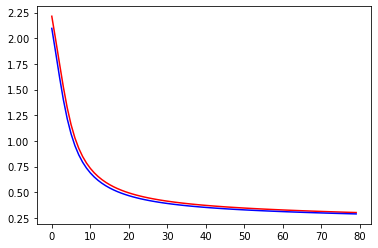

In [24]:
plt.plot(loss_epoch , 'r')
plt.plot(loss_test , 'b')
plt.show()

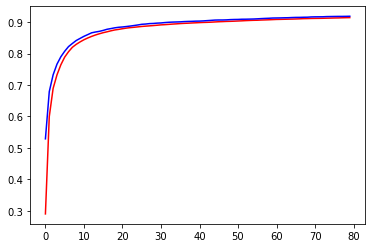

In [25]:
plt.plot(accuracy_epoch , 'r')
plt.plot(accuracy_test , 'b')
plt.show()